# RQ1

[RQ1] In what period of the year Taxis are used more? Create a plot that, for each month, shows the average 
number of trips recorded each day. Due to the differences among New York zones, we want to visualize the same 
information for each boroughs. Do you notice any difference among them? Provide comments and plausible explanations 
about what you observe (e.g.: what is the month with the highest daily average?).

#### First Part

In [1]:
"""IMPORTING THINGS"""
import pandas as pd
import matplotlib.pyplot as plt
import datetime 
import numpy as np

"""LOADING CSV FILES"""
months = ['', 'January', 'February', 'March', 'April', 'May', 'June']
numberOfDays = [0, 31, 28, 31, 30, 31, 30]

##Making our dataframe
df_rq1 = pd.DataFrame(columns=['Month', 'Mean_Trips'])

for i in range(1,7):
    
    taxi_data = pd.read_csv('C:/Users/sanch/Desktop/Taxi Data/yellow_tripdata_2018-0'+str(i)+'.csv', sep=',', encoding='latin1', usecols=['tpep_pickup_datetime'])

    """RQ1"""
    ##We start filtering by dates because there is some extra information
    rq1 = taxi_data[(taxi_data['tpep_pickup_datetime'] >= '2018-0'+str(i)+'-01') & (taxi_data['tpep_pickup_datetime'] <= '2018-0'+str(i)+'-31')]

    name = "".join(months[i])
    mean = int( len(rq1) / numberOfDays[i] )
    df_rq1.loc[i] = [name, mean]
    
print(df_rq1)



      Month Mean_Trips
1   January     272273
2  February     303263
3     March     294960
4     April     310167
5       May     287362
6      June     290443


<BarContainer object of 6 artists>

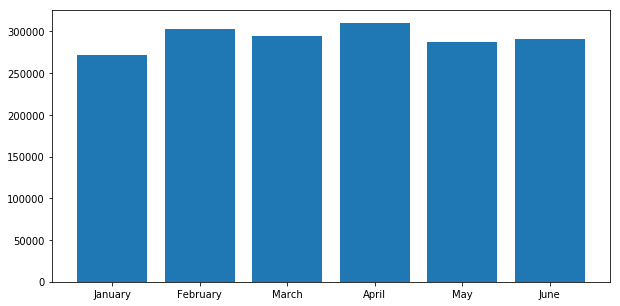

In [2]:
plt.figure(figsize=(10,5))
y1 = df_rq1['Month']
y2 = df_rq1['Mean_Trips']
plt.bar(y1,y2)

This plot shows the difference between the mean of trips for each month. We can see that the higher values are in February and April and the lowest value it takes place on January.

#### Second Part

In [11]:
"""IMPORTING THINGS"""
import pandas as pd
import matplotlib.pyplot as plt
import datetime 
import numpy as np

"""LOADING CSV FILES"""
months = ['', 'January', 'February', 'March', 'April', 'May', 'June']
numberOfDays = [0, 31, 28, 31, 30, 31, 30]
listOfBoroughs = []

for i in range(1,7):
    
    taxi_data = pd.read_csv('C:/Users/sanch/Desktop/Taxi Data/yellow_tripdata_2018-0'+str(i)+'.csv', sep=',', encoding='latin1', usecols=['tpep_pickup_datetime', 'PULocationID'])
    taxi_zone_lookup = pd.read_csv('C:/Users/sanch/Desktop/Taxi Data/taxi_zone_lookup.csv', sep=',', encoding='latin1', usecols=['LocationID', 'Borough'])

    """MERGING YELLOW TAXI WITH ZONES"""
    taxi_merge = pd.merge(taxi_data, taxi_zone_lookup, how="inner", left_on="PULocationID", right_on="LocationID")

    """RQ1"""
    ##We start filtering by dates because there is some extra information
    rq1 = taxi_merge[(taxi_merge['tpep_pickup_datetime'] >= '2018-0'+str(i)+'-01') & (taxi_merge['tpep_pickup_datetime'] <= '2018-0'+str(i)+'-31')]

    ##Getting boroughs names:
    if(i ==1):
        listOfBoroughs = taxi_merge.loc[:, ['Borough']].drop_duplicates().values.tolist()
        ##Making our dataframe
        df_rq1_byZones = pd.DataFrame(columns=['Borough'])
        x=0
        for name in listOfBoroughs:
            df_rq1_byZones.loc[x] = ["".join(name)]
            x += 1

    j=0
    listOfMeans = []
    for nameB in listOfBoroughs:
        name = "".join(nameB)
        mean = int( len(rq1.loc[rq1['Borough'] == name]) / numberOfDays[i] )
        listOfMeans.append(mean)
        j += 1
    
    meansDf = pd.DataFrame({months[i]: listOfMeans})
    df_rq1_byZones = df_rq1_byZones.join(meansDf)
    
df_rq1_byZones = df_rq1_byZones.drop([4])
df_rq1_byZones = df_rq1_byZones.reset_index(drop=True)

In [12]:
df_rq1_byZones

,Borough,January,February,March,April,May,June
0,Manhattan,247484,277401,267899,280945,260033,262610
1,Queens,16489,17303,17797,19876,19098,19157
2,Bronx,232,234,320,347,341,340
3,Brooklyn,3130,3396,3815,3968,3850,4098
4,Staten Island,4,3,4,4,4,5
5,EWR,17,17,20,23,23,22


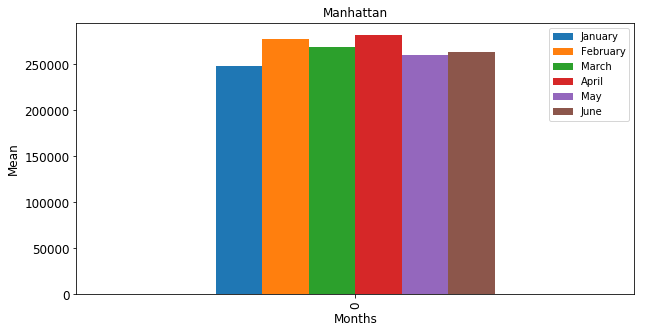

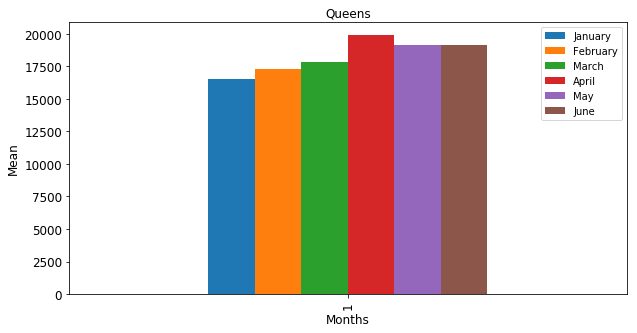

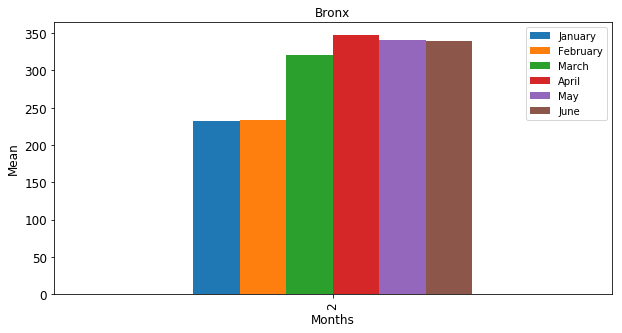

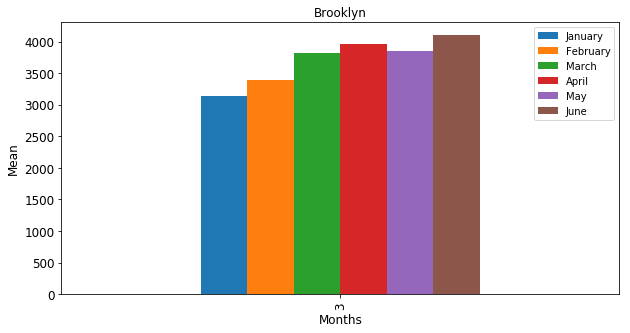

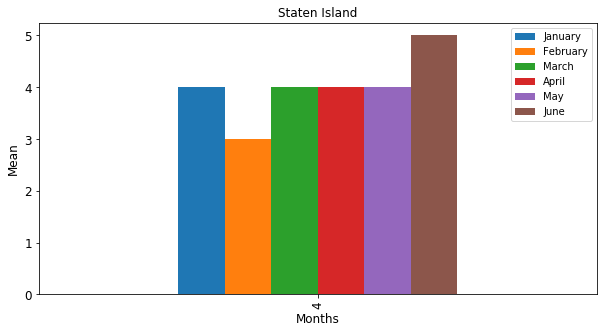

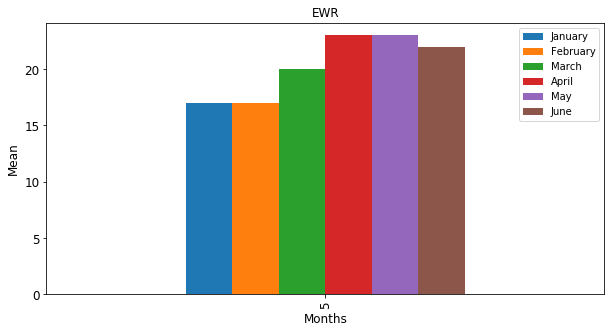

In [14]:
months = ['Borough', 'January', 'February', 'March', 'April', 'May', 'June']
listOfPrint = [0,1,2,3,4,5]
for z in listOfPrint:
    oneplot = df_rq1_byZones.loc[z:z, months]
    
    ax = oneplot[months[1:7]].plot(kind='bar',  figsize=(10, 5), legend=True, fontsize=12, title="".join(df_rq1_byZones.loc[z:z, 'Borough']))
    ax.set_xlabel("Months", fontsize=12)
    ax.set_ylabel("Mean", fontsize=12)
    plt.show()

This plots show the difference between the mean of trips for each month and borough. 
- In Manhattan we can observe that the mean of trips increments each months having the maximum on April as in NYC
- In Queens and Bronx happen almost the same, but in Bronx they have the maximum on June
- In Brooklyn on May and June they use less the taxis in comparison with the other months.
- In Staten Island have the maximum of mean trips on April May and June.

# RQ2

[RQ2] _What are the time slots with more passengers?_ Set your own time slots and discover which are those when Taxis drive the highest number of passengers overall New York and repeat the analysis for each borough. Provide the results through a visualization and comment them.

### DATA PREPARATION
For every we want to analyze (the months from January until June), we repeat the following operations to prepare the data:
- Import the colums "pickup date and time" and "pickup location ID" from the CSV
- Remove all the data that isn't part of the month
- Create a new column containing a variable timezone derived from the pickup time
- Append the result data to a temporary array

After we collected and cleaned all the data, we merge it into the *taxi data* variable.

In [1]:
# IMPORTS
import pandas as pd
import matplotlib.pyplot as plt
import datetime 
import numpy as np
from matplotlib.ticker import FuncFormatter
import numpy as np

pd.options.mode.chained_assignment = None

timestamps = ["00", "01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23"]
taxi_data = pd.DataFrame(columns = timestamps)
tmp = []

#Repeat for every file
for csv in range(1,7):
    taxidata = None
    rq2 = None

    # Loading CSV file
    taxi_data = pd.read_csv('data/yellow_tripdata_2018-0'+str(csv)+'.csv', 
                            sep=',', 
                            encoding='latin1', 
                            usecols = ['tpep_pickup_datetime', 'PULocationID'])
    
    
    # Cleaning Data filtering just for the actual days of the month
    rq2 = taxi_data[(taxi_data['tpep_pickup_datetime'] >= '2018-0'+str(csv)+'-01') & 
                    (taxi_data['tpep_pickup_datetime'] <= '2018-0'+str(csv)+'-31')]


    # Creating a new column for the timezone
    rq2['time_zone'] = rq2['tpep_pickup_datetime'].apply(lambda x:x[11:13])
    
    tmp.append(rq2)
    del rq2

taxi_data = pd.concat([*tmp])
del tmp
taxi_data.head(5)


,tpep_pickup_datetime,PULocationID,time_zone
0,2018-01-01 00:21:05,41,00
1,2018-01-01 00:44:55,239,00
2,2018-01-01 00:08:26,262,00
3,2018-01-01 00:20:22,140,00
4,2018-01-01 00:09:18,246,00


### DATA EXPLORATION OVERALL NEW YORK
We want to explore how's the data overall NYC. The first step is to count how many values every time zone has. Then we'll proceed to plot the result.

In [2]:
# Count the values
toplot = taxi_data['time_zone'].value_counts()
toplot = toplot.sort_index()

In [3]:
# Create all the possible timezones for the values (to use as indexes)
timestamps = ["00", "01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23"]

In [4]:
color = 150+(toplot / max(toplot) * 105)
color = ['#1F77'+(str(hex(int(x)))).replace('0x','') for x in color ]

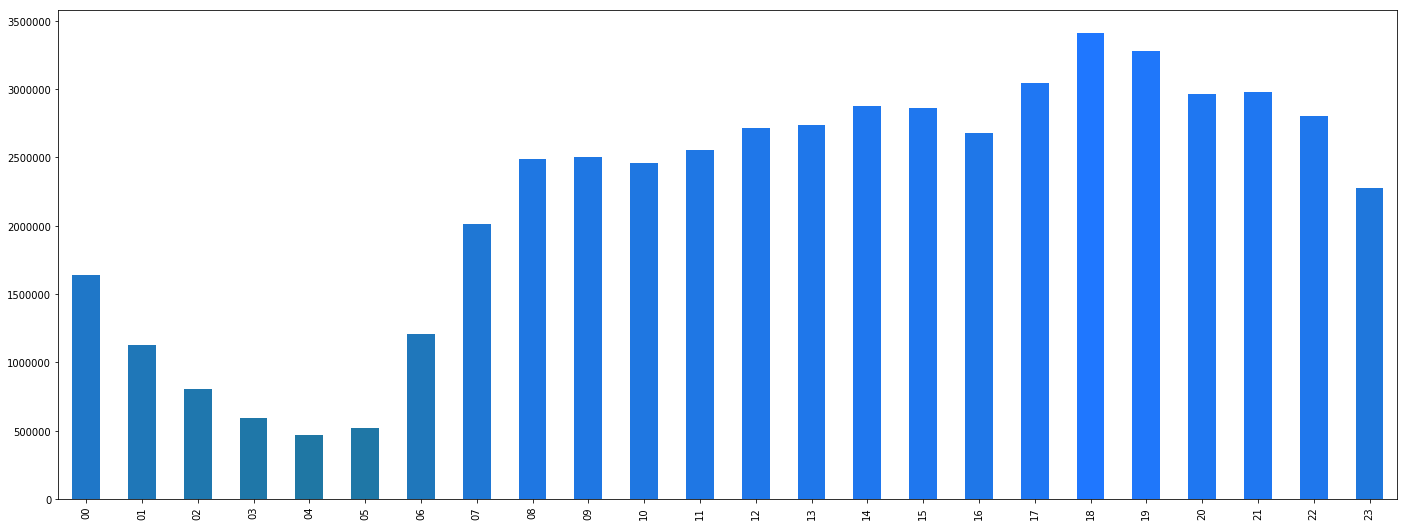

In [5]:
toplot.plot(kind="bar", figsize=(24,9), color= color)

We can see that the hours with less traffic are the night ones (02 to 05), meanwhile during the day the number of client is higher and quite constant, with a peak in the early evening (18 -19).

### DATA EXPLORATION OF TRAFFIC HOURS BY BOROUGH
We want to see how the traffic behaves in every single borough. First we merge the dataset we have with the one containing the names of the boroughs. Then we count the data we have, this time grouped by borough. We then drop the Unknown data, since we don't know at which category they're part of, and finally we plot a stacked chart of the values

In [6]:
taxi_zone_lookup = pd.read_csv('data/taxi_zone_lookup.csv', sep=',', encoding='latin1')
taxi_data = taxi_data.join(taxi_zone_lookup.set_index('LocationID').add_prefix('PU_'), on='PULocationID')
taxi_data = taxi_data[['time_zone','PU_Borough']]

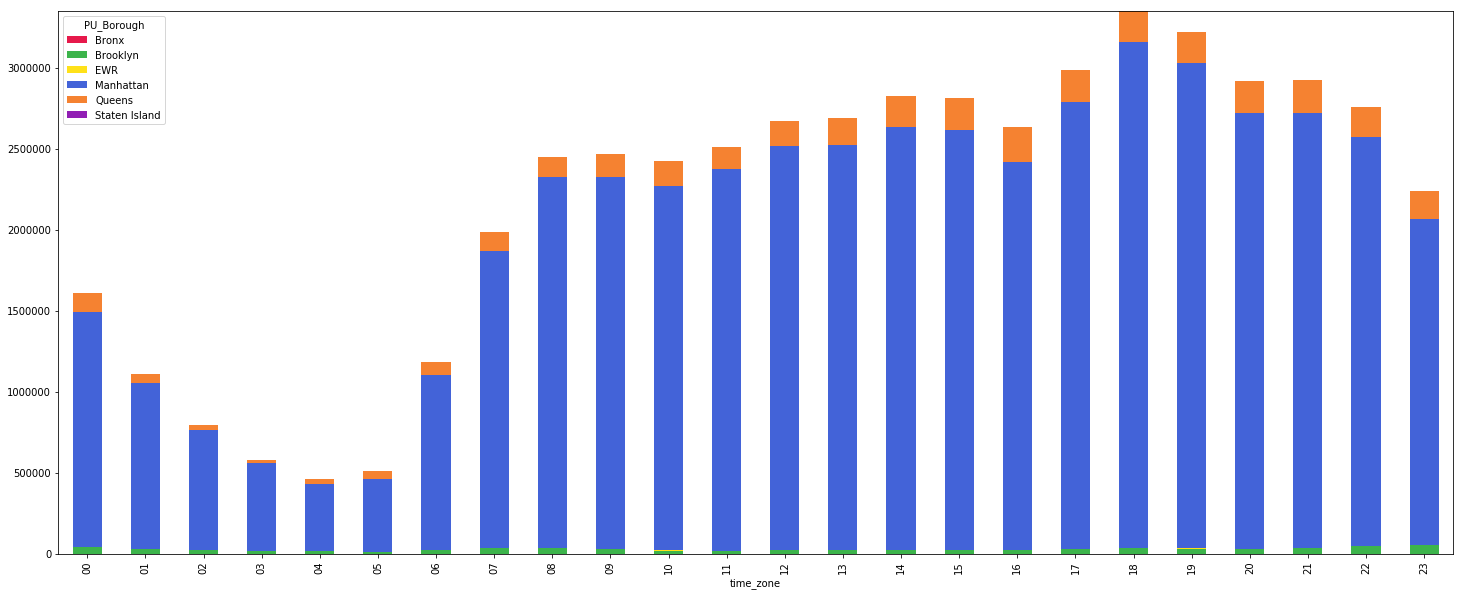

In [7]:
toplot = taxi_data.groupby(['time_zone', 'PU_Borough']).size().unstack('PU_Borough').fillna(0)
toplot.drop('Unknown', axis=1, inplace=True)
toplot[toplot.columns.tolist()].plot(figsize=(25, 10),kind='bar', stacked=True, color = ['#e6194b', '#3cb44b', '#ffe119','#4363d8', '#f58231', '#911eb4'])

Since Manhattan values are incredibly larger respect to the other boroughts, we cannot really see how they behaves. We decided then to keep going with the analysis, plotting the values for every single borough.

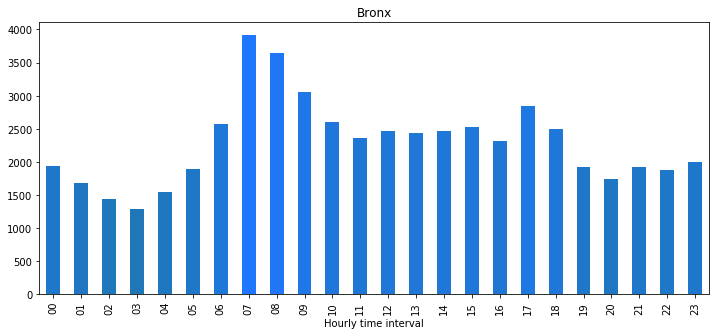

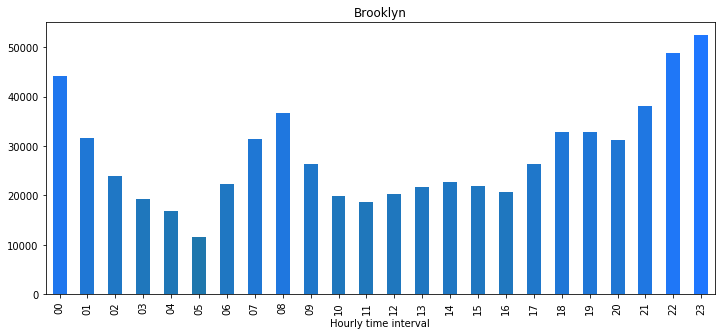

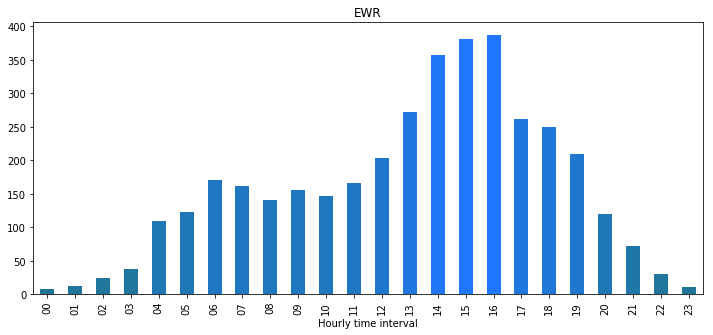

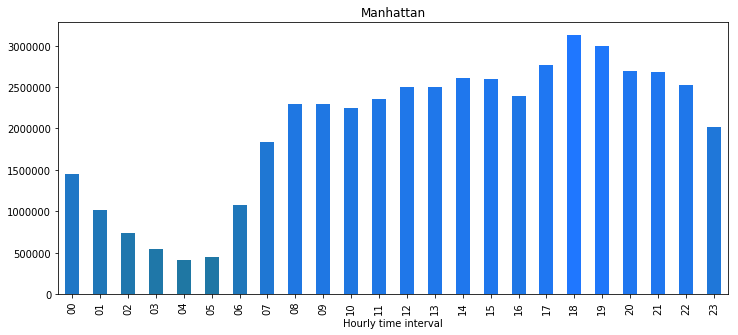

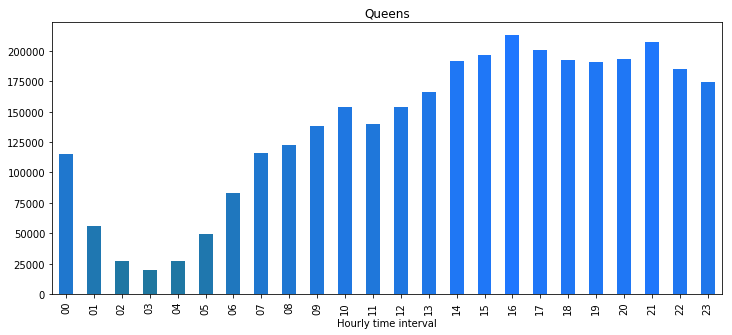

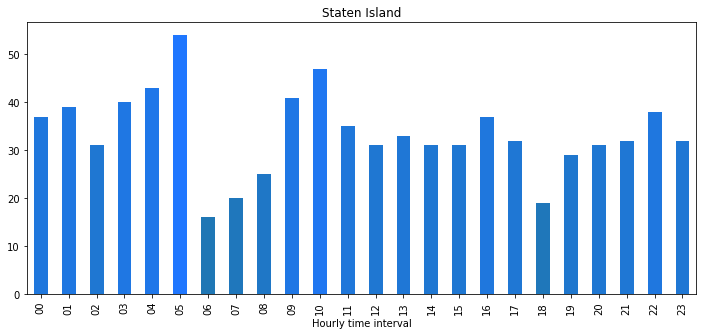

In [9]:

for b in toplot.columns.tolist():
    color = 150+(toplot[b] / max(toplot[b]) * 105)
    color = ['#1F77'+(str(hex(int(x)))).replace('0x','') for x in color ]
    toplot[b].plot(figsize=(12, 5), 
                   kind='bar', 
                   stacked=True, 
                   title = str(b), 
                   color = color).set_xlabel("Hourly time interval")
    plt.show()



From this plots we can observe that:
- Bronx has the highest peak in the early morning (7-8) and not much difference during the day
- Brooklyn has two peaks, one in the early morning, and the other one in the late night (after 23), probably because of the nightlife it is famous for
- The airport has a peak that goes between 14 and 17, and goes very little in the night (supposely when the airport has no flights)
- Manhattan has the highest value of all the boroughts, with distributed values during the day
- The Queens has increasing values for the early and late night, probably here as well because of a significative nightlife
- State Island presents the smallest values, with the highest peak at 5am, and the lowest right after in the next time zone. This values are not very meaningful as presented here.

# RQ3

[RQ3] _Do the all trips last the same?_ Let's put our attention on the distribution of trip's duration. Provide a plot for it and comment what you see. Run this analysis for NYC and for each borough (and obviously comment the results!). 

#### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

### Obtaining data to study duration trips of all NYC (1)

- Start Variables
- Make a loop to read all the csv files
- Calculate and save all the differences of time
- Save all data in a dataset

In [2]:
##Starting Variables and Making our dataframe
months = ['', 'January', 'February', 'March', 'April', 'May', 'June']
df_rq3 = pd.DataFrame()

##Loop 6 times, each per month
for i in range(1,7):
    
    ##Reading the columns of date and time
    taxi_data = pd.read_csv('C:/Users/sanch/Desktop/Taxi Data/yellow_tripdata_2018-0'+str(i)+'.csv', sep=',', encoding='latin1', usecols=['tpep_pickup_datetime', 'tpep_dropoff_datetime'])
    
    ##Filtering by dates because there is some extra information
    rq3 = taxi_data[(taxi_data['tpep_pickup_datetime'] >= '2018-0'+str(i)+'-01') & (taxi_data['tpep_pickup_datetime'] <= '2018-0'+str(i)+'-31')]
    
    ##Calculate the difftimes and saving in listOfTimes
    numberOfRows = len(rq3['tpep_pickup_datetime'])
    
    ##Calculate the differences of time
    a =  pd.to_datetime(rq3['tpep_pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
    b =  pd.to_datetime(rq3['tpep_dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')
    
    ##Add column to the dataset
    df_rq3[months[i]] = (b-a).dt.total_seconds()
    
    del rq3, taxi_data

Put all month's columns in one column

In [3]:
a=df_rq3[months[1]]
b=df_rq3[months[2]]
c=df_rq3[months[3]]
d=df_rq3[months[4]]
e=df_rq3[months[5]]
f=df_rq3[months[6]]

oneColumnData = pd.concat([a,b,c,d,e,f])
oneColumnData

0           198.0
1          1090.0
2           355.0
3          1949.0
4          1068.0
5           199.0
6           616.0
7           144.0
8           267.0
9           320.0
10          346.0
11         1479.0
12          251.0
13          573.0
14          946.0
15         1026.0
16         2553.0
17          253.0
18         2205.0
19          356.0
20         1183.0
21          757.0
22         1273.0
23         1610.0
24          775.0
25          274.0
26         1321.0
27          170.0
28          434.0
29          417.0
            ...  
8446530      10.0
8446550     612.0
8446552    1434.0
8446598     600.0
8446634     121.0
8446650     855.0
8446798     699.0
8448320     890.0
8449297     478.0
8449534     583.0
8449608     772.0
8449808     614.0
8449886     302.0
8449964     733.0
8449965     718.0
8451114     501.0
8451115     317.0
8451716     751.0
8451717     704.0
8451718     531.0
8452013    1479.0
8452050    2403.0
8452816    2662.0
8453204     975.0
8453752   

#### Plotting Results with density graphs
We are plotting the density.
To have an idea of the range of duration we are calculating the max values of duration for each month. We have omitted some data as they are scarce and even wrong.

In [4]:
print(oneColumnData.max())
print(df_rq3.max())

531167.0
January     322924.0
February    332349.0
March       341821.0
April       148281.0
May          86399.0
June        531167.0
dtype: float64


This plot refers to density duration of all months:

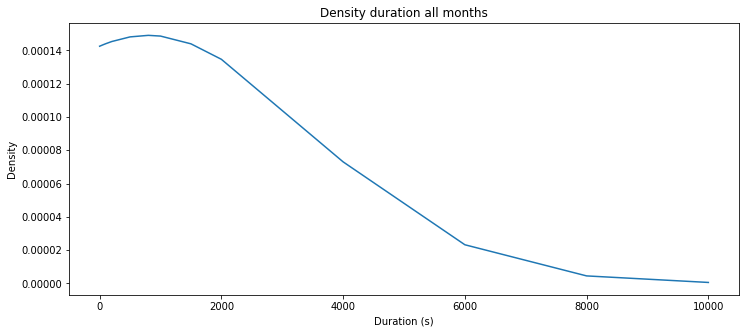

In [5]:
rangesPlot = [0,10,50,100,200,500,800,1000,1500,2000,4000,6000,8000,10000]
ax = oneColumnData.plot.density(ind=rangesPlot, figsize=(12,5), title='Density duration all months')
ax.set_xlabel("Duration (s)")
ax.set_ylabel("Density")
plt.show()

As we can see most of the trips last between 10 to 2000 seconds then the plot starts growing down.

This plot refers to density duration trips for each month:

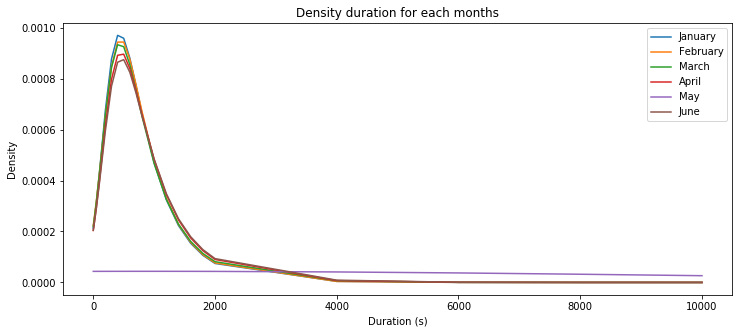

In [7]:
rangesPlo2 = [0,10,50,100,200,300,400,500,600,700,800,1000,1200,1400,1600,1800,2000,4000,6000,8000,10000]
ax2 = df_rq3.loc[0:, months[1:7]].plot.density(ind=rangesPlo2, figsize=(12,5), title='Density duration for each months')
ax2.set_xlabel("Duration (s)")
ax2.set_ylabel("Density")
plt.show()

As you can see in the previous graph, all the months follow the same density distribution with maximum in 500 s while Mayo follows a more stable density distribution.

Now we are plotting the data by intervals:

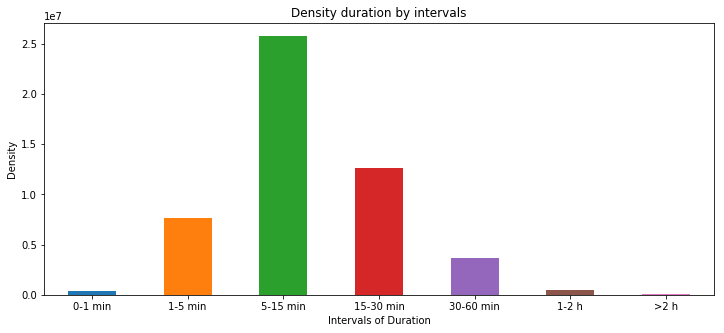

In [10]:
out = pd.cut(oneColumnData, bins=[0, 60, 300, 900, 1800, 3600, 7200, max(oneColumnData)])
ax3 = out.value_counts(sort=False).plot.bar(rot=0, figsize=(12,5), title='Density duration by intervals')
ax3.set_xlabel("Intervals of Duration")
ax3.set_ylabel("Density")
ax3.set_xticklabels(['0-1 min', '1-5 min', '5-15 min', '15-30 min', '30-60 min', '1-2 h', '>2 h'])
plt.show()

In [12]:
oneColumnData.mean()/60

16.492708356351244

We have plot intervals [0-1 min, 1-5 min, 5-15 min, 15-30 min, 30-60 min, 60-120 min ...]. As we can see in the plot most of the trips last 5-15 min, it follows 15-30 min and 1-5 min.

### Obtaining data to study duration trips for each Borough (2)

- Start Variables
- Make a loop to read all the csv files
- Calculate and save all the differences of time
- Save all data in a dataset

In [13]:
##Starting Variables and Making our dataframe
months = ['', 'January', 'February', 'March', 'April', 'May', 'June']
taxi_zone_lookup = pd.read_csv('C:/Users/sanch/Desktop/Taxi Data/taxi_zone_lookup.csv', sep=',', encoding='latin1', usecols=['LocationID', 'Borough'])
total_data = pd.DataFrame()
partial_data = pd.DataFrame()

##Getting boroughs names:
listOfBoroughs = taxi_zone_lookup.loc[:, ['Borough']].drop_duplicates().values.tolist()

##Loop 6 times, each per month
for i in range(1,7):
    
    ##Reading the columns of date and time
    taxi_data = pd.read_csv('C:/Users/sanch/Desktop/Taxi Data/yellow_tripdata_2018-0'+str(i)+'.csv', sep=',', encoding='latin1', usecols=['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'PULocationID'])
    
    ##Merging the data with Boroughs
    rq3 = pd.merge(taxi_data, taxi_zone_lookup, how="inner", left_on="PULocationID", right_on="LocationID")
    
    ##We start filtering by dates because there is some extra information
    rq3 = rq3[(rq3['tpep_pickup_datetime'] >= '2018-0'+str(i)+'-01') & (rq3['tpep_pickup_datetime'] <= '2018-0'+str(i)+'-31')]
    print(i)

    ##Calculate the differences of time
    a =  pd.to_datetime(rq3['tpep_pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
    b =  pd.to_datetime(rq3['tpep_dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')
    listOfDurations = (b-a).dt.total_seconds()
    rq3['duration'] = listOfDurations
    
    partial_data = pd.concat([rq3['Borough'], rq3['duration']], axis=1)
    total_data = pd.concat([total_data, partial_data])
    
    del a, b, listOfDurations, partial_data, taxi_data, rq3
    

1
2
3
4
5
6


In [15]:
total_data = total_data.reset_index(drop=True)
total_data

,Borough,duration
0,Manhattan,198.0
1,Manhattan,620.0
2,Manhattan,159.0
3,Manhattan,2713.0
4,Manhattan,1797.0
5,Manhattan,219.0
6,Manhattan,405.0
7,Manhattan,788.0
8,Manhattan,268.0
9,Manhattan,315.0


#### Plotting Results with density graphs
We are plotting the density for each Borough.

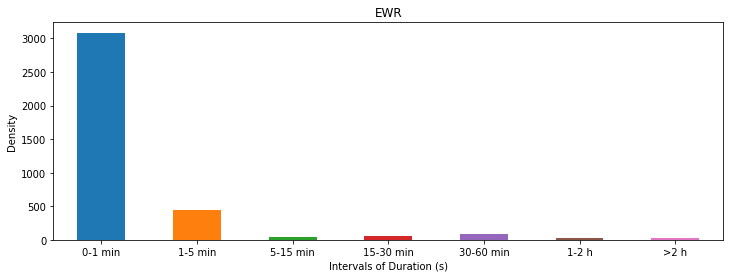

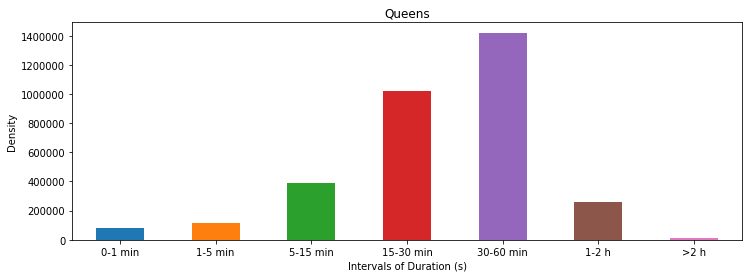

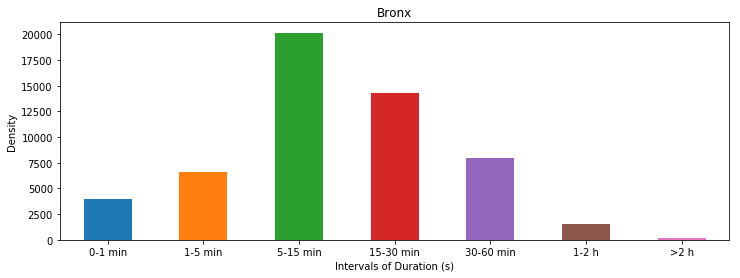

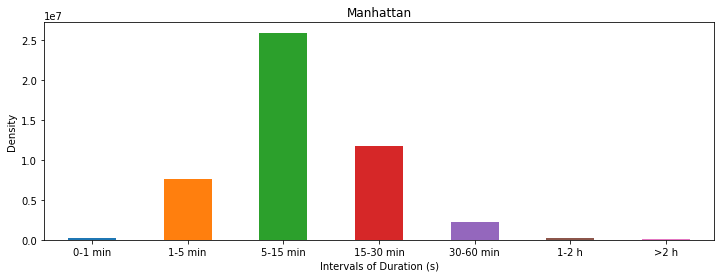

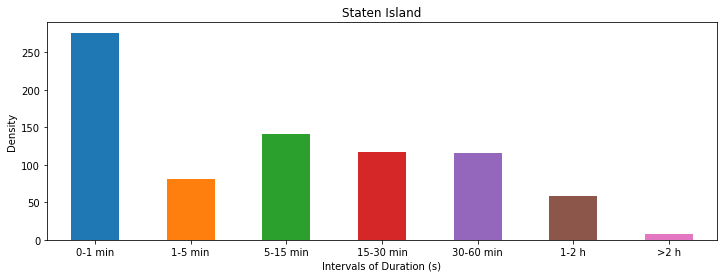

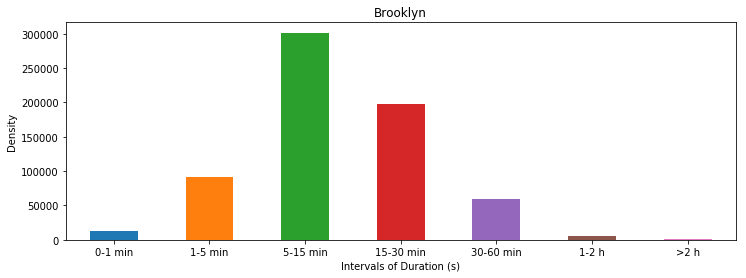

In [16]:
for i in range(0,6):
    value = "".join(listOfBoroughs[i])
    a = pd.DataFrame({value : total_data[ total_data['Borough'] == value ].duration})

    out = pd.cut(a[value], bins=[0, 60, 300, 900, 1800, 3600, 7200, max(a[value])])
    ax4 = out.value_counts(sort=False).plot.bar(rot=0, title=value, figsize=(12,4))
    ax4.set_xlabel("Intervals of Duration (s)")
    ax4.set_ylabel("Density")
    ax4.set_xticklabels(['0-1 min', '1-5 min', '5-15 min', '15-30 min', '30-60 min', '1-2 h', '>2 h'])
    plt.show()
del a, out

As you can see in the previous graphs we can detect that:

-In EWR most trips last between 0 and 5 min. Since it is the airport

-In Queens most trips last between 15 min and one hour

-In the Bronx most trips last between 5 min and a half hour

-In Manhattan the duration is between 5 min and 15 min

-In Staten Island they last less than 5 min, most of it is a very small place

-In Brooklyn the trayetos of between 5 min and a half hour predominate

# RQ4

[RQ4]_What is the most common way of payments?_ Discover the way payments are executed in each borough and visualize the number of payments for any possible means. Then run the Chi-squared test to see whether the method of payment is correlated to the borough. Then, comment the results.

#### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime 
import numpy as np
from scipy import stats

In [93]:
##Starting Variables and Making our dataframe
taxi_zone_lookup = pd.read_csv('C:/Users/bchdnl63l42f205d/Desktop/Magistrale/Primo anno/AMD/HW 2/taxi_zone_lookup.csv', sep=',', encoding='latin1', usecols=['LocationID', 'Borough'])
total_data = pd.DataFrame()
partial_data = pd.DataFrame()

##Getting boroughs names:
listOfBoroughs = taxi_zone_lookup.loc[:, ['Borough']].drop_duplicates().values.tolist()

##Loop 6 times, each per month
for i in range(1,7):
    
    ##Reading the columns of interest
    taxi_data = pd.read_csv('C:/Users/bchdnl63l42f205d/Desktop/Magistrale/Primo anno/AMD/HW 2/yellow_tripdata_2018-0'+str(i)+'.csv', sep=',', encoding='latin1', usecols=['tpep_pickup_datetime', 'payment_type', 'PULocationID'])
    
    ##Merging the data with Boroughs
    rq4 = pd.merge(taxi_data, taxi_zone_lookup, how="inner", left_on="PULocationID", right_on="LocationID")
    
    ##We start filtering by dates because there is some extra information
    rq4 = rq4[(rq4['tpep_pickup_datetime'] >= '2018-0'+str(i)+'-01') & (rq4['tpep_pickup_datetime'] <= '2018-0'+str(i)+'-31')]
    print(i)
    
    ##Creating the dataset with the variables we want to analyze
    partial_data = pd.concat([rq4['Borough'], rq4['payment_type']], axis=1)
    total_data = pd.concat([total_data, partial_data])
    
    del partial_data, taxi_data, rq4
    
##Getting the types of payment: 
listOfPayments = total_data.loc[:, ['payment_type']].drop_duplicates().values.tolist()


1
2
3
4
5
6


# Analysis

In general, in **NY** the payment type most used is the credit card (_payment type 1_).

In [94]:
fr=pd.crosstab(index=total_data['payment_type'], columns="count")
fr.index=["payment type 1","payment type 2","payment type 3","payment type 4"]
fr

col_0,count
payment type 1,36930065
payment type 2,15715616
payment type 3,280643
payment type 4,75904


To continue the analysis, we focus our attention in the different **boroughs**.

For this reason, we eliminate the rows with an _"Unknown"_ value for the borough because they don't give us usefull informations in this case.

In [95]:
df = total_data[total_data.Borough != "Unknown"]
listOfBoroughs.remove(['Unknown'])
df

,Borough,payment_type
0,Manhattan,2
1,Manhattan,2
2,Manhattan,2
3,Manhattan,1
4,Manhattan,1
5,Manhattan,1
6,Manhattan,1
7,Manhattan,2
8,Manhattan,1
9,Manhattan,1


To have a better idea of the different types of payment used in the boroughs, we create a contingency table with the two variables and we plot it.

In [96]:
double_fr = pd.crosstab(index=df['Borough'], columns=df['payment_type'])
double_fr.columns=["payment type 1","payment type 2","payment type 3","payment type 4"]
double_fr

,payment type 1,payment type 2,payment type 3,payment type 4
Borough,,,,
Bronx,27372,25721,1490,353
Brooklyn,434596,226642,8665,1892
EWR,3000,540,218,46
Manhattan,33600292,14225987,223013,62534
Queens,2279641,985276,36739,8786
Staten Island,430,313,50,11


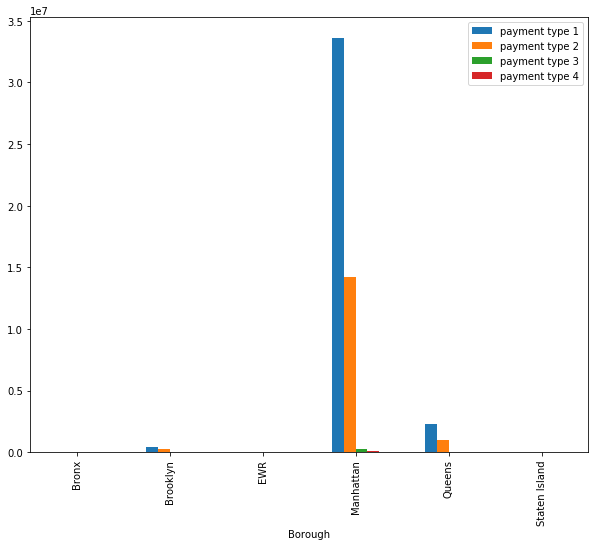

In [97]:
double_fr.plot(kind="bar", 
                 figsize=(10,8))

Given the different values between boroughs, we make a plot for each.

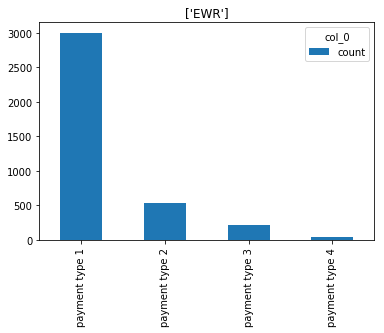

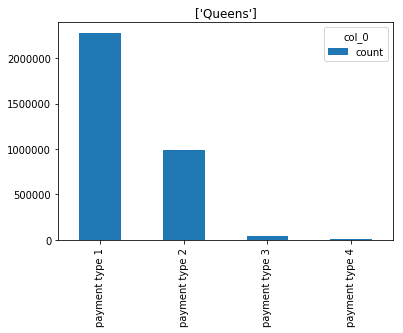

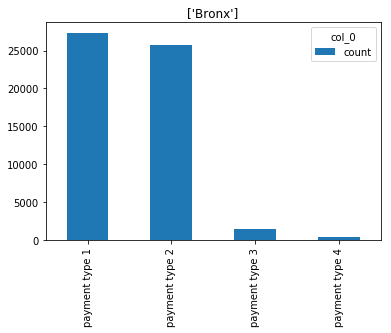

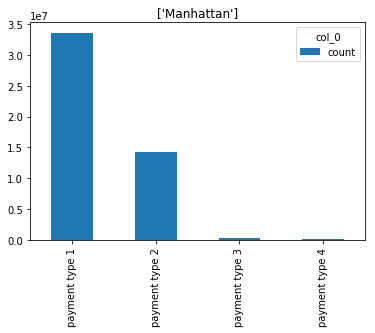

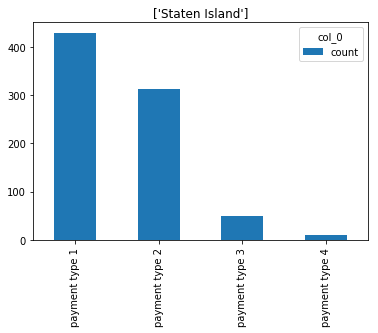

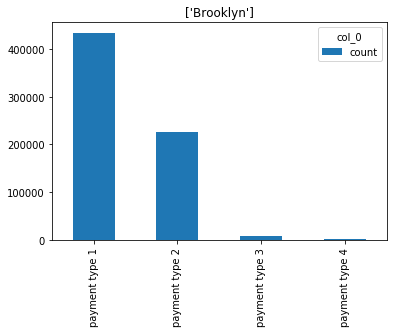

In [98]:
for b in listOfBoroughs:
    name = "".join(b)
    sub=df.loc[df['Borough'] == name]
    
    my_tab = pd.crosstab(index=sub["payment_type"], 
                          columns="count")
    my_tab.index=["payment type 1","payment type 2","payment type 3","payment type 4"]
    my_tab.plot.bar()
    plt.title(b)

The credit card payment is always the favourite one, independently from the borough. The payment type which varies the most in the different areas is the cash one (_payment type 2_). Notable that the cash payment is almost equal to the credit card one in **Bronx**.

To check if there is dependence between these two variables we run the **Chi-square test**.

In [105]:
chi2, p, dof, ex=stats.chi2_contingency(double_fr,correction=False)
print("chi2 = ",chi2)

chi2 =  62592.54830551318


The obtained value is high, but it may be due to the elevated number of data and, conseguently, of observed frequencies. This index rappresents the difference between the _observed contingency table_ and the _expected contingency table in case of independence_. 

So in this case, we can immagine a slight dependence between the borough and the payment type: the $\chi^2$ point it out but the trend of the two tables is very similar. 

In [100]:
# Observed values
double_fr

,payment type 1,payment type 2,payment type 3,payment type 4
Borough,,,,
Bronx,27372,25721,1490,353
Brooklyn,434596,226642,8665,1892
EWR,3000,540,218,46
Manhattan,33600292,14225987,223013,62534
Queens,2279641,985276,36739,8786
Staten Island,430,313,50,11


In [101]:
# Expected values
D=[]
for row in ex:
    r=[]
    for i in row:
        r.append(round(i,0))
    D.append(r) 
mx=pd.DataFrame(D)
mx.columns=["payment type 1","payment type 2","payment type 3","payment type 4"]
mx.index=["Bronx","Brooklyn","EWR","Manhattan","Queens","Staten Island"]

mx

,payment type 1,payment type 2,payment type 3,payment type 4
Bronx,38284.0,16290.0,285.0,78.0
Brooklyn,468167.0,199199.0,3480.0,948.0
EWR,2651.0,1128.0,20.0,5.0
Manhattan,33528654.0,14266019.0,249237.0,67916.0
Queens,2307014.0,981605.0,17149.0,4673.0
Staten Island,560.0,238.0,4.0,1.0


# RQ5

[RQ5] _Does a long distance correlate with the duration of the trip on average?_ Make a plot that show the dependence between distance and duration of the trip. Then compute the Pearson Coefficient, is it significant? Comment the results you obtain.

In [1]:
# IMPORTS
import pandas as pd
import matplotlib.pyplot as plt
import datetime 
import numpy as np
from matplotlib.ticker import FuncFormatter
from scipy import stats

pd.options.mode.chained_assignment = None

In [3]:
taxi_data = pd.DataFrame()
tmp = []

#Repeat for every file
for csv in range(1,7):    

    # Loading CSV file
    data = pd.read_csv('data/yellow_tripdata_2018-0'+str(csv)+'.csv', 
                            sep=',', 
                            encoding='latin1', 
                            usecols = ['tpep_pickup_datetime', 'tpep_dropoff_datetime','trip_distance']) #, nrows=5000000
    
    
    # Cleaning Data filtering just for the actual days of the month
    rq5 = data[(data['tpep_pickup_datetime'] >= '2018-0'+str(csv)+'-01') & 
                (data['tpep_pickup_datetime'] <= '2018-0'+str(csv)+'-31')]
    
    tmp.append(rq5)
    print(csv)
    del rq5

taxi_data = pd.concat([*tmp])
del tmp
taxi_data.head(5)

1
2
3
4
5
6


,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance
0,2018-01-01 00:21:05,2018-01-01 00:24:23,0.5
1,2018-01-01 00:44:55,2018-01-01 01:03:05,2.7
2,2018-01-01 00:08:26,2018-01-01 00:14:21,0.8
3,2018-01-01 00:20:22,2018-01-01 00:52:51,10.2
4,2018-01-01 00:09:18,2018-01-01 00:27:06,2.5


In [4]:
##Calculate the differences of time
start =  pd.to_datetime(taxi_data['tpep_pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
end =  pd.to_datetime(taxi_data['tpep_dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')

##Add column to the dataset
taxi_data['time_difference'] = (end-start).dt.total_seconds() #

taxi_data = taxi_data.loc[(taxi_data['time_difference'] > 0.0) &
                          (taxi_data['trip_distance'] > 0.0) &
                          (taxi_data['trip_distance'] < 10000) &
                          (taxi_data['time_difference'] < 28800),  #maximum duration of the trip: 8 hours
                          ['time_difference','trip_distance']]
taxi_data.head(5)

,time_difference,trip_distance
0,198.0,0.5
1,1090.0,2.7
2,355.0,0.8
3,1949.0,10.2
4,1068.0,2.5


In [5]:
taxi_data_avg = taxi_data.groupby(['trip_distance']).mean().reset_index()
taxi_data_avg.head(5)

,trip_distance,time_difference
0,0.01,114.199920
1,0.02,93.149237
2,0.03,87.487187
3,0.04,100.732147
4,0.05,115.829594


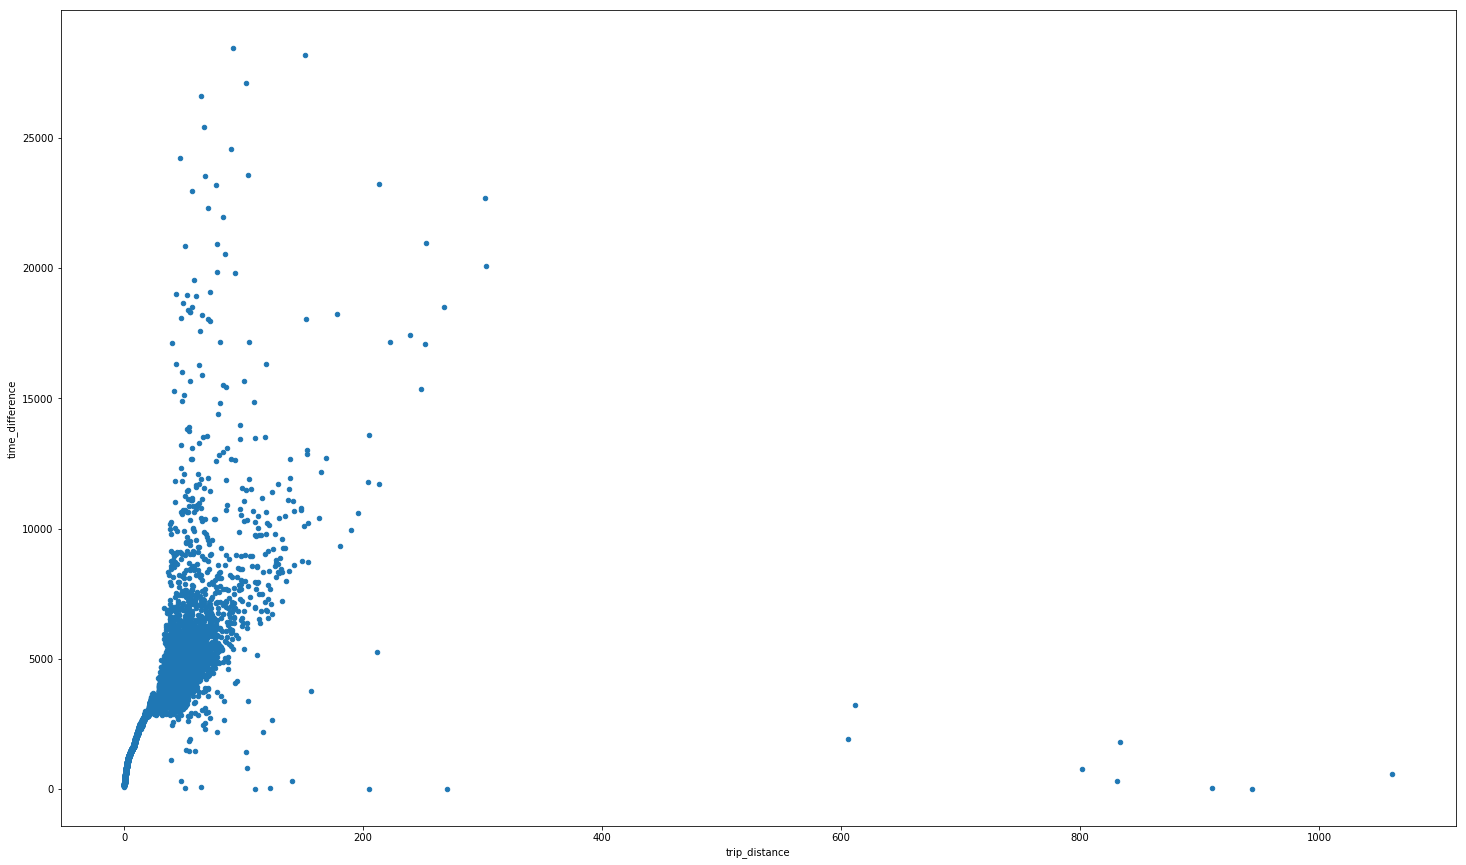

In [6]:
taxi_data_avg.plot.scatter(x= 'trip_distance',y= 'time_difference', figsize=(25, 15))#,ylim = (0, 25000),xlim=(0,300)

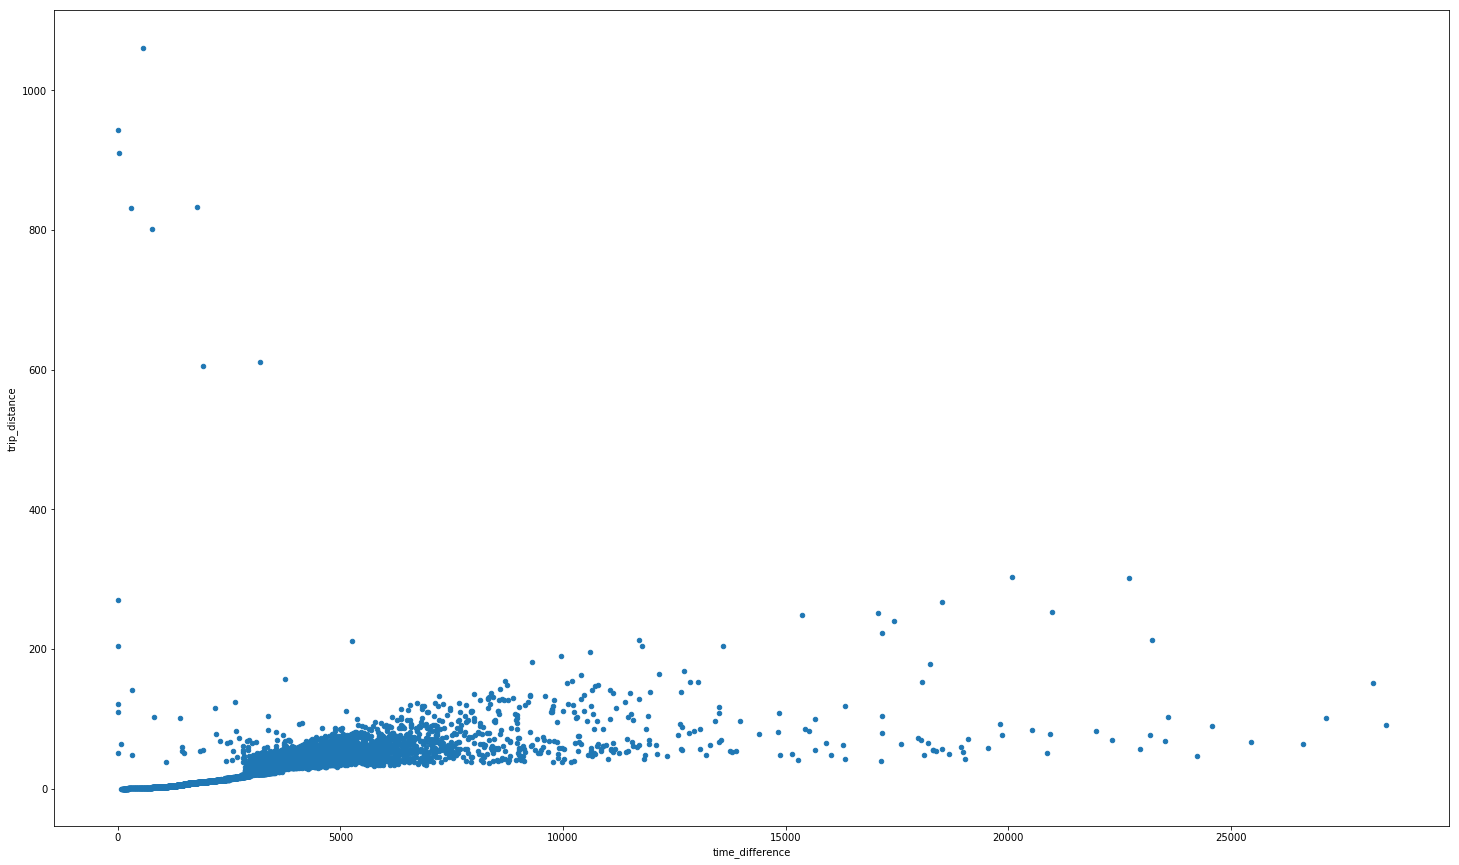

In [7]:
taxi_data_avg.plot.scatter(x = 'time_difference', y = 'trip_distance', figsize=(25, 15)) #, xlim = (0, 80), ylim = (0, 100)

Eliminating the outliers 

In [8]:
taxi_data_avg2=taxi_data_avg.loc[taxi_data_avg['trip_distance'] <500.0]

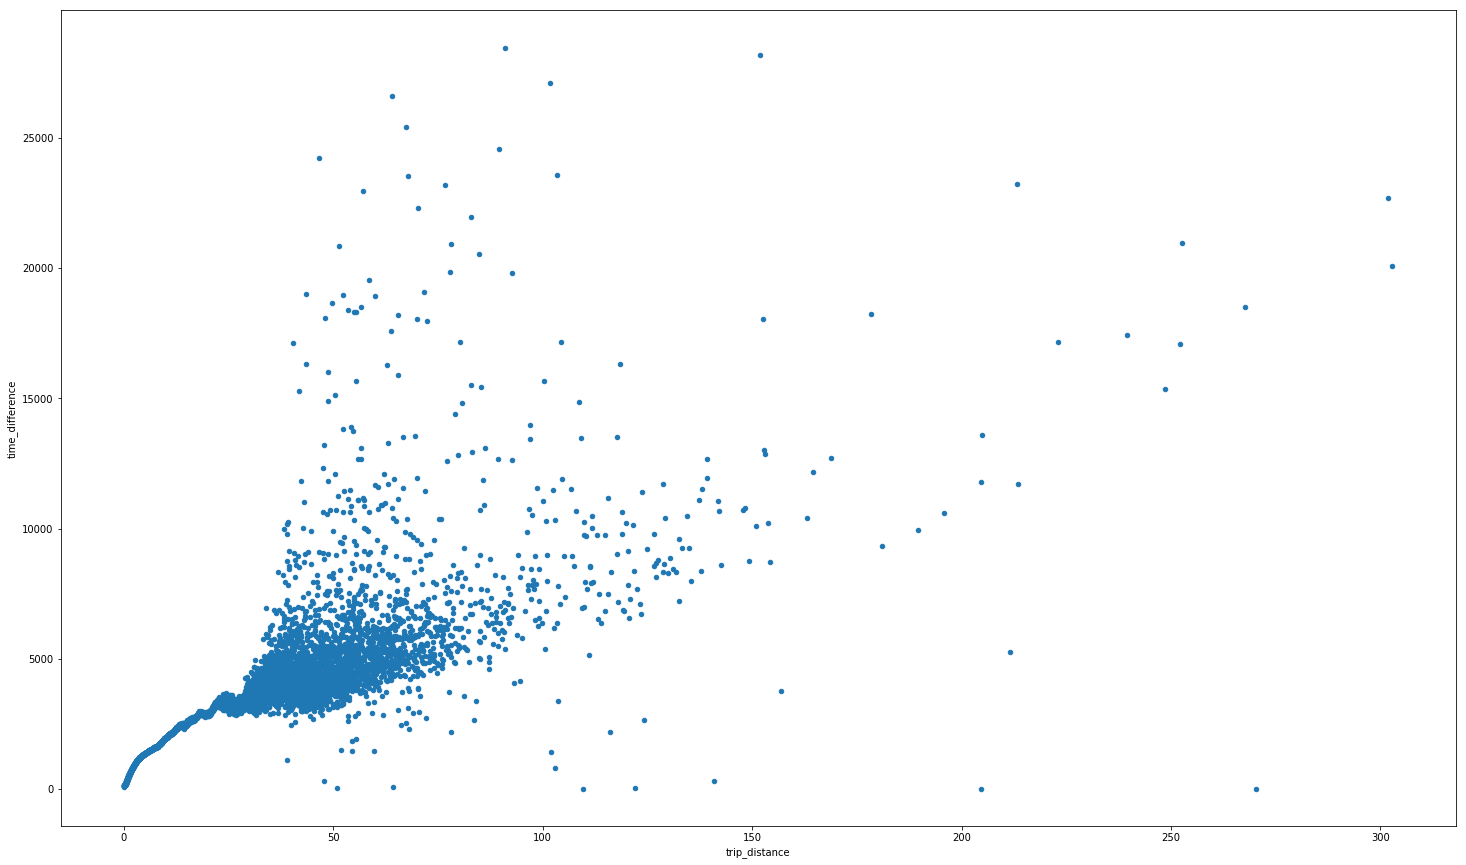

In [9]:
taxi_data_avg2.plot.scatter(x= 'trip_distance',y= 'time_difference', figsize=(25, 15))

### Pearson Coefficient

In [10]:
#with outliers
coef,p=stats.pearsonr(taxi_data_avg['trip_distance'],taxi_data_avg['time_difference'])
print("Pearson Coefficient = ",coef)
print("p value = ",p)

Pearson Coefficient =  0.4689122975474665
p value =  0.0


In [11]:
#without outliers
coef,p=stats.pearsonr(taxi_data_avg2['trip_distance'],taxi_data_avg2['time_difference'])
print("Pearson Coefficient = ",coef)
print("p value = ",p)

Pearson Coefficient =  0.7435889190102948
p value =  0.0


In both situation, the _Pearson Coefficient_ identify a positive correlation between the two variables, which is stronger after eliminitang the irregular data.

# CRQ1

[CRQ1] _Does the fare for mile change across NY's borough?_ We want to discover whether the expenses of a user that enjoys Taxis in one zone is different from those that uses it in another one.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import seaborn as sns

## 1. Considering the fare amount:

#### - Compute the price per mile equation for each trip.

In [2]:
##Starting Variables and Making our dataframe
months = ['', 'January', 'February', 'March', 'April', 'May', 'June']
crq1 = pd.DataFrame()
##Getting info about boroughs
taxi_zone_lookup = pd.read_csv('C:/Users/sanch/Desktop/Taxi Data/taxi_zone_lookup.csv', sep=',', encoding='latin1', usecols=['LocationID', 'Borough'])
##Getting boroughs names:
listOfBoroughs = taxi_zone_lookup.loc[:, ['Borough']].drop_duplicates().values.tolist()
pd.options.display.float_format = '{:.2f}'.format

##Loop 6 times, each per month
for i in range(1,7):
    
    ##Reading the columns of date and time
    cols = ['tpep_pickup_datetime', 'trip_distance', 'fare_amount', 'PULocationID']
    taxi_data = pd.read_csv('C:/Users/sanch/Desktop/Taxi Data/yellow_tripdata_2018-0'+str(i)+'.csv', sep=',', encoding='latin1', usecols=cols)
    
    ##Merging the data with Boroughs
    taxi_data = pd.merge(taxi_data, taxi_zone_lookup, how="inner", left_on="PULocationID", right_on="LocationID")
    
    ##Filtering by dates because there is some extra information
    taxi_data = taxi_data[(taxi_data.loc[:,'tpep_pickup_datetime'] >= '2018-0'+str(i)+'-01') & (taxi_data.loc[:,'tpep_pickup_datetime'] <= '2018-0'+str(i)+'-31')]
    
    ##Concat all months data in one
    crq1 = pd.concat([crq1, taxi_data])
    
##Adding price per mile
crq1.loc[:,'P'] = crq1.loc[:,'fare_amount']/crq1.loc[:,'trip_distance']

del taxi_data
    

We delete unuseful data

In [3]:
crq1 = crq1.drop(['LocationID', 'PULocationID', 'tpep_pickup_datetime'], axis=1)
if ['Unknown'] in listOfBoroughs: listOfBoroughs.remove(['Unknown'])
crq1

,trip_distance,fare_amount,Borough,P
0,0.50,4.50,Manhattan,9.00
1,1.36,8.50,Manhattan,6.25
2,0.30,4.00,Manhattan,13.33
3,14.10,41.50,Manhattan,2.94
4,8.77,29.00,Manhattan,3.31
5,0.76,5.00,Manhattan,6.58
6,1.06,6.50,Manhattan,6.13
7,2.40,11.50,Manhattan,4.79
8,1.40,6.00,Manhattan,4.29
9,0.90,5.50,Manhattan,6.11


#### - Run the mean and the standard deviation of the new variable for each borough. Then plot the distribution. What do you see?

Mean of each borough:

In [4]:
dicOfMeans = {}
for borough in listOfBoroughs:
    name = "".join(borough)
    dicOfMeans[name] = crq1[crq1['Borough'] == name].P.replace([np.inf, -np.inf], np.nan).dropna().mean()
    
for i in dicOfMeans.items():
    print(i[0], i[1])

EWR 849.2631289784102
Queens 6.725728532365999
Bronx 8.799992712723103
Manhattan 6.757738128690167
Staten Island 19.38973069315423
Brooklyn 6.160861155965918


Standard deviation of each borough:

In [5]:
dicOfStd = {}
for borough in listOfBoroughs:
    name = "".join(borough)
    dicOfStd[name] = crq1[crq1['Borough'] == name].P.replace([np.inf, -np.inf], np.nan).dropna().std()
    
for i in dicOfStd.items():
    print(i[0], i[1])

EWR 2288.033467422429
Queens 109.0991335324439
Bronx 110.79642748554133
Manhattan 61.902349672932615
Staten Island 105.84321826225259
Brooklyn 58.51706607519577


Plot of ditributions for each Borough:

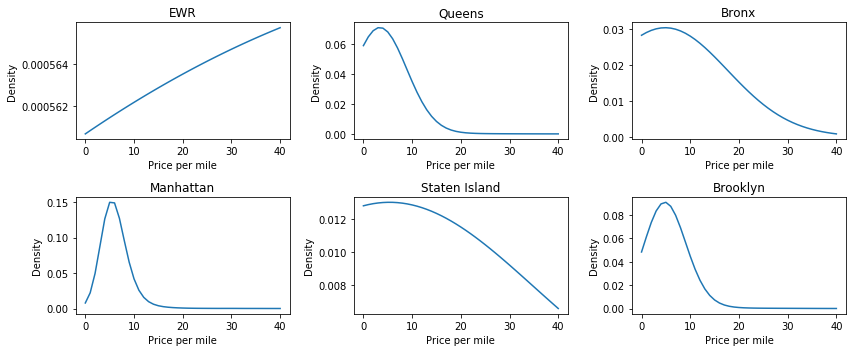

In [6]:
rangesPlot = list(range(0, 41, 1))
fig, axes = plt.subplots(nrows=2, ncols=3)

a=0
b=0
for borough in listOfBoroughs:
    name = "".join(borough)
    
    ax = crq1[crq1['Borough'] == name].P.replace([np.inf, -np.inf], np.nan).dropna().plot.density(ax=axes[a,b], ind=rangesPlot, figsize=(12,5), title=name)
    ax.set_xlabel("Price per mile")
    ax.set_ylabel("Density")
    
    #to manage the plots
    if(b == 2):
        a += 1
        b = 0
    else:
        b += 1
    
fig.tight_layout()
plt.show()


Then we plot the different prices per mile by intervals:

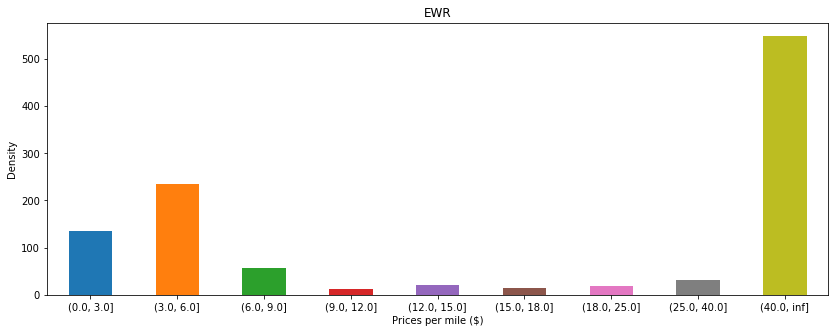

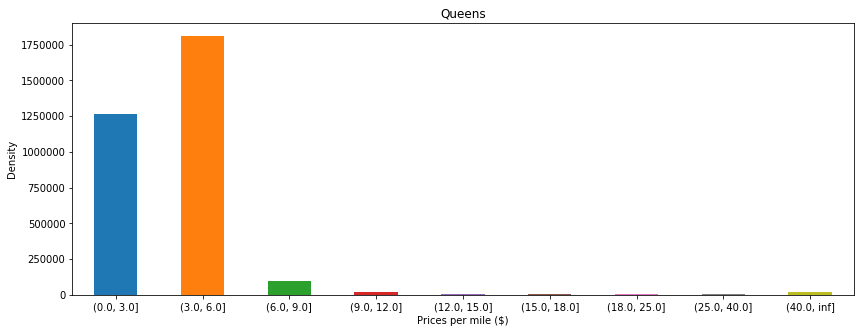

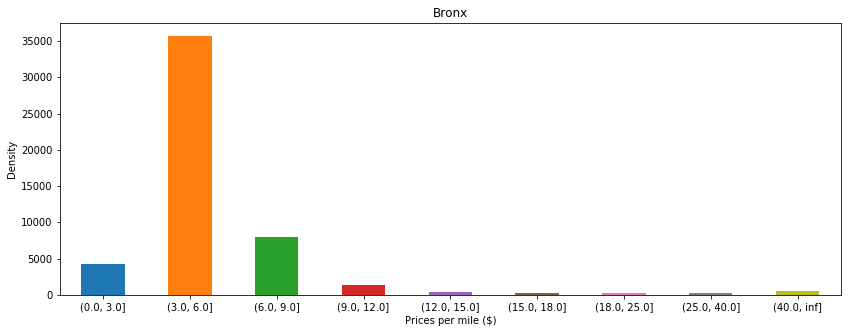

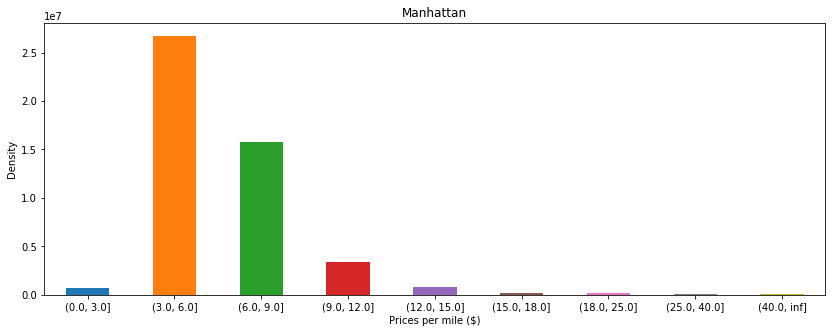

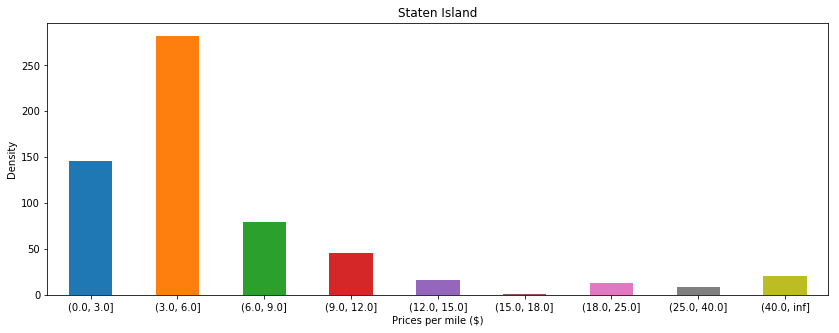

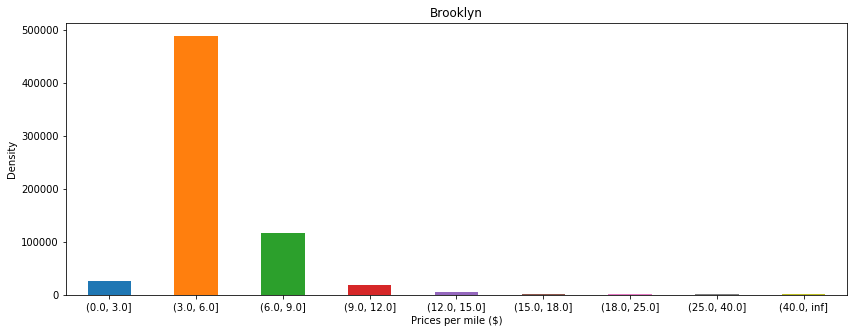

In [7]:
for borough in listOfBoroughs:
    name = "".join(borough)
    out = pd.cut(crq1[crq1['Borough'] == name].P.replace([np.inf, -np.inf], np.nan).dropna(), bins=[0, 3, 6, 9, 12, 15, 18, 25, 40, max(crq1[crq1['Borough'] == name].P)])
    ax1 = out.value_counts(sort=False).plot.bar(rot=0, figsize=(14,5), title=name)
    ax1.set_xlabel("Prices per mile ($)")
    ax1.set_ylabel("Density")
    plt.show()

We can see that the means are included between 6 and 20 except for EWR and that the standard deviations are high. Also in the plots we can observe that most of the values are between 3 and 6 $/mile and depending of each borough they have different prices.

#### - Run the t-test among all the possible pairs of distribution of different boroughs.


In [8]:
from scipy.stats import ttest_ind

nameList = []
for borough in listOfBoroughs:
    name1 = "".join(borough)
    nameList.append(name1)
    data1 = crq1[crq1['Borough'] == name1].P.replace([np.inf, -np.inf], np.nan).dropna()

    for borough in listOfBoroughs:
        name2 = "".join(borough)
        if((name2 != name1) and (name2 not in nameList)):
            data2 = crq1[crq1['Borough'] == name2].P.replace([np.inf, -np.inf], np.nan).dropna()

            print("Between", name1, name2)
            # compare samples
            stat, p = ttest_ind(data1, data2)
            print('Statistics=%.5f, p=%.5f' % (stat, p))
            # interpret
            alpha = 0.05

            if p > alpha:
                print('Same distributions (fail to reject H0)')
            else:
                print('Different distributions (reject H0)')
            print("\n")

Between EWR Queens
Statistics=244.18782, p=0.00000
Different distributions (reject H0)


Between EWR Bronx
Statistics=79.14408, p=0.00000
Different distributions (reject H0)


Between EWR Manhattan
Statistics=455.50395, p=0.00000
Different distributions (reject H0)


Between EWR Staten Island
Statistics=9.07561, p=0.00000
Different distributions (reject H0)


Between EWR Brooklyn
Statistics=255.58107, p=0.00000
Different distributions (reject H0)


Between Queens Bronx
Statistics=-4.26741, p=0.00002
Different distributions (reject H0)


Between Queens Manhattan
Statistics=-0.84548, p=0.39784
Same distributions (fail to reject H0)


Between Queens Staten Island
Statistics=-2.90632, p=0.00366
Different distributions (reject H0)


Between Queens Brooklyn
Statistics=4.08866, p=0.00004
Different distributions (reject H0)


Between Bronx Manhattan
Statistics=7.45247, p=0.00000
Different distributions (reject H0)


Between Bronx Staten Island
Statistics=-2.38001, p=0.01732
Different distribut

#### - Can you say that statistically significant differences, on the averages, hold among zones? In other words, are Taxis trip in some boroughs, on average, more expensive than others?

We can see that we have statistically significant differences as we can see in the results of the T-Test. 
Only passed the test: 
    - Queens - Manhattan
So we can observe having a look at the average that some boroughs are more expensive than others.

## 2. The price per mile might depend on traffic the Taxi finds on its way. So we try to mitigate this effect:

#### - Likely, the duration of the trip says something about the city's congestion, especially if combined with the distances. It might be a good idea to weight the price for mile using the time T needed to complete the trip. Thus, instead of equation, you can use P'=P*T, where equation is the time needed to complete the trip.

In [3]:
##Starting Variables and Making our dataframe
months = ['', 'January', 'February', 'March', 'April', 'May', 'June']
taxi_zone_lookup = pd.read_csv('C:/Users/sanch/Desktop/Taxi Data/taxi_zone_lookup.csv', sep=',', encoding='latin1', usecols=['LocationID', 'Borough'])
total_data = pd.DataFrame()
partial_data = pd.DataFrame()

##Getting boroughs names:
listOfBoroughs = taxi_zone_lookup.loc[:, ['Borough']].drop_duplicates().values.tolist()
pd.options.display.float_format = '{:.4f}'.format

##Loop 6 times, each per month
for i in range(1,7):
    
    ##Reading the columns of date and time
    cols = ['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'trip_distance', 'fare_amount', 'PULocationID']
    taxi_data = pd.read_csv('C:/Users/sanch/Desktop/Taxi Data/yellow_tripdata_2018-0'+str(i)+'.csv', sep=',', encoding='latin1', usecols=cols)
    
    ##Merging the data with Boroughs
    taxi_data = pd.merge(taxi_data, taxi_zone_lookup, how="inner", left_on="PULocationID", right_on="LocationID")
    
    ##We start filtering by dates because there is some extra information
    taxi_data = taxi_data[(taxi_data['tpep_pickup_datetime'] >= '2018-0'+str(i)+'-01') & (taxi_data['tpep_pickup_datetime'] <= '2018-0'+str(i)+'-31')]
    print(i)

    ##Calculate the differences of time
    a =  pd.to_datetime(taxi_data['tpep_pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
    b =  pd.to_datetime(taxi_data['tpep_dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')
    listOfDurations = (b-a).dt.total_seconds()
    taxi_data['duration'] = listOfDurations
    
    partial_data = pd.concat([taxi_data['fare_amount'], taxi_data['trip_distance'], taxi_data['Borough'], taxi_data['duration']], axis=1)
    total_data = pd.concat([total_data, partial_data])
    
    del a, b, listOfDurations, partial_data, taxi_data

##Adding price per mile
total_data.loc[:,'P'] = (total_data.loc[:,'fare_amount']/total_data.loc[:,'trip_distance'])
#total_data.loc[:,'T'] = (total_data.loc[:,'duration']/total_data.loc[:,'trip_distance'])
#T = total_data.loc[:, 'duration'].replace([np.inf, -np.inf], np.nan).mean() / total_data.loc[:, 'trip_distance'].replace([np.inf, -np.inf], np.nan).mean()
total_data.loc[:,'P_s'] = (total_data.loc[:,'P']/total_data.loc[:,'duration'])


1
2
3
4
5
6


Clean unuseful data

In [4]:
if ['Unknown'] in listOfBoroughs: listOfBoroughs.remove(['Unknown'])
total_data

,fare_amount,trip_distance,Borough,duration,P,P_s
0,4.5000,0.5000,Manhattan,198.0000,9.0000,0.0455
1,8.5000,1.3600,Manhattan,620.0000,6.2500,0.0101
2,4.0000,0.3000,Manhattan,159.0000,13.3333,0.0839
3,41.5000,14.1000,Manhattan,2713.0000,2.9433,0.0011
4,29.0000,8.7700,Manhattan,1797.0000,3.3067,0.0018
5,5.0000,0.7600,Manhattan,219.0000,6.5789,0.0300
6,6.5000,1.0600,Manhattan,405.0000,6.1321,0.0151
7,11.5000,2.4000,Manhattan,788.0000,4.7917,0.0061
8,6.0000,1.4000,Manhattan,268.0000,4.2857,0.0160
9,5.5000,0.9000,Manhattan,315.0000,6.1111,0.0194


#### - Run the mean and the standard deviation of the new variable for each borough. Then plot the distribution. What do you see?

Means of each Borough

In [5]:
dicOfMeans2 = {}
for borough in listOfBoroughs:
    name = "".join(borough)
    dicOfMeans2[name] = total_data[total_data['Borough'] == name].P_s.replace([np.inf, -np.inf], np.nan).dropna().mean()

for i in dicOfMeans2.items():
    print(i[0], i[1])

EWR 145.16633792764137
Queens 0.33230758520139225
Bronx 0.4534775888054723
Manhattan 0.0705992570359198
Staten Island 1.0780039624400757
Brooklyn 0.12378394028005883


Standard Deviation of each Borough

In [6]:
dicOfStd2 = {}
for borough in listOfBoroughs:
    name = "".join(borough)
    dicOfStd2[name] = total_data[total_data['Borough'] == name].P_s.replace([np.inf, -np.inf], np.nan).dropna().std()
    
for i in dicOfStd2.items():
    print(i[0], i[1])

EWR 641.8754449758485
Queens 19.48055460911341
Bronx 22.295362132037596
Manhattan 7.699277641884767
Staten Island 10.956018907230417
Brooklyn 9.07458013703268


Plot of ditributions for each Borough:

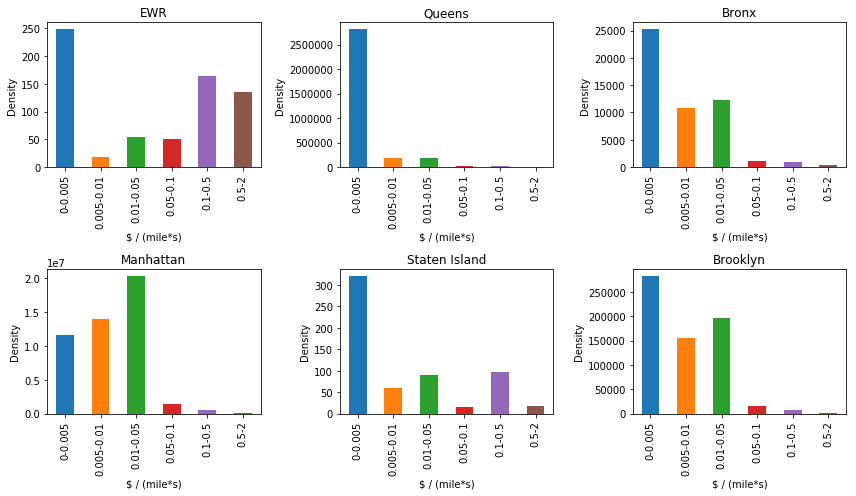

In [7]:
rangesPlot = [0, 0.005, 0.01, 0.05, 0.1, 0.5, 2]
fig, axes = plt.subplots(nrows=2, ncols=3)

a=0
b=0
for borough in listOfBoroughs:
    name = "".join(borough)
    
    out = pd.cut(total_data[total_data['Borough'] == name].P_s.replace([np.inf, -np.inf], np.nan).dropna(), bins=rangesPlot, include_lowest=True)
    ax = out.value_counts(sort=False).plot.bar(ax=axes[a,b], figsize=(12,7), title=name)
    ax.set_xlabel("$ / (mile*s)")
    ax.set_ylabel("Density")
    ax.set_xticklabels(["0-0.005", "0.005-0.01", "0.01-0.05", "0.05-0.1", "0.1-0.5", "0.5-2"])
    
    #to manage the plots
    if(b == 2):
        a += 1
        b = 0
    else:
        b += 1
    
fig.tight_layout()
plt.show()

We can see that the means are included between 0 and 1 except for EWR and that the standard deviations are more stable and lower than in the previous exercise. Also in the plots we can observe that most of the values are between 0 and 0.005 $/(mile*s) and depending of each borough they have different prices.

#### - Run the t-test among all the possible pairs of new distribution of different boroughs.

In [28]:
from scipy.stats import ttest_ind

nameList = []
for borough in listOfBoroughs:
    name1 = "".join(borough)
    nameList.append(name1)
    data1 = total_data[total_data['Borough'] == name1].P_s.replace([np.inf, -np.inf], np.nan).dropna()

    for borough in listOfBoroughs:
        name2 = "".join(borough)
        if((name2 != name1) and (name2 not in nameList)):
            data2 = total_data[total_data['Borough'] == name2].P_s.replace([np.inf, -np.inf], np.nan).dropna()

            print("Between", name1, name2)
            # compare samples
            stat, p = ttest_ind(data1, data2)
            print('Statistics=%.5f, p=%.5f' % (stat, p))
            # interpret
            alpha = 0.05

            if p > alpha:
                print('Same distributions (fail to reject H0)')
            else:
                print('Different distributions (reject H0)')
            print("\n")

Between EWR Queens
Statistics=214.63912, p=0.00000
Different distributions (reject H0)


Between EWR Bronx
Statistics=49.72270, p=0.00000
Different distributions (reject H0)


Between EWR Manhattan
Statistics=593.22109, p=0.00000
Different distributions (reject H0)


Between EWR Staten Island
Statistics=5.61981, p=0.00000
Different distributions (reject H0)


Between EWR Brooklyn
Statistics=174.02063, p=0.00000
Different distributions (reject H0)


Between Queens Bronx
Statistics=-1.39302, p=0.16361
Same distributions (fail to reject H0)


Between Queens Manhattan
Statistics=51.07613, p=0.00000
Different distributions (reject H0)


Between Queens Staten Island
Statistics=-0.95848, p=0.33782
Same distributions (fail to reject H0)


Between Queens Brooklyn
Statistics=8.51097, p=0.00000
Different distributions (reject H0)


Between Bronx Manhattan
Statistics=11.20203, p=0.00000
Different distributions (reject H0)


Between Bronx Staten Island
Statistics=-0.70037, p=0.48370
Same distributi

#### - Can you say that statistically significant differences, on the averages, hold among zones? In other words, are Taxis trip in some boroughs, on average, more expensive than others?

We can see that we have statistically significant differences as we can see in the results of the T-Test. 
Only passed the test: 
    - Bronx - Staten Island
    - Queens - Staten Island
    - Queens - Bronx
So we can observe having a look at the average that some boroughs are more expensive than others.

## 3. Compare the results obtained for the price per mile and the weighted price for mile. What do you think about that?

Comparing the T-Test from both exercises we can see that we can obtain different results if we take into account the time that takes to complete the trip. In the first exercise we have that Queens-Manhattan passed the test and then when taking into account T, we can see that Bronx - Staten Island; Queens - Staten Island;
Queens - Bronx passed the test. So they are results completly different. Also we can see that the standard deviation is lower in the second one and the averages are closer in the second one again. We think that is better to take into account the time to get more accurate results.

# CRQ2

[CRQ2]: Visualize Taxis movements! NYC is divided in many Taxis zones. For each yellow cab trip we know the zone the Taxi pick up and drop off the users. Let's visualize, on a chropleth map, the number of trips that starts in each zone. Than, do another map to count the races that end up in the single zone. Comment your discoveries. To perform this task we use the library folium. You find some examples of chorophlet maps here and here. The Geojson we use to trace the zones is taxi_zones.json in the Homework's repository.

**Since we had problem in visualizing the maps inside the jupyter notebook and since the maps made this file of size bigger than the limits accepted by Github, we decided just to plot the results in HTML, that can be found inside the folder `results/` .**

In [1]:
import os
import folium
from IPython.core.display import display, HTML
import codecs
import json
import pandas as pd

pd.options.mode.chained_assignment = None

To start with the Choropleth visualization, we import the GeoJSON file containing the shapes of our map.

In [2]:
with open(os.path.join('data', 'taxi_zones.json')) as json_file:
    nyc_json = json.load(json_file)

And we display a test map to visualize the Boroughs of NYC. 

In [3]:
test = folium.Map([40.7, -74], zoom_start=10.4, tiles='cartodbpositron')

In [4]:
folium.GeoJson(nyc_json).add_to(test)

In [ ]:
test #to keep the file size under 25mb, this test map has been removed

Then we import all the data as we did previously importing month per month:
- select the data we need (the pick up and drop off locations IDs)
- Then we filter the data to be sure is part of the month
- We append this data to a temporary array
- Once every month has been read, we concatenate the months
- We combine the pick up and drop off IDs with more informations loaded from taxi_zone_lookup.csv, to have names and other informations of the Boroughs

In [6]:
tmp = []

#Repeat for every file
for csv in range(1,7):
    taxidata = None
    rq2 = None

    # Loading CSV file
    taxi_data = pd.read_csv('data/yellow_tripdata_2018-0'+str(csv)+'.csv', 
                            sep=',', 
                            encoding='latin1', 
                            usecols = ['tpep_pickup_datetime','PULocationID','DOLocationID']) #, nrows = 100000
    
    
    # Cleaning Data filtering just for the actual days of the month
    rq2 = taxi_data[(taxi_data['tpep_pickup_datetime'] >= '2018-0'+str(csv)+'-01') & 
                    (taxi_data['tpep_pickup_datetime'] <= '2018-0'+str(csv)+'-31')]
    
    tmp.append(rq2)
    print("executed"+str(csv))
    del rq2

taxi_data = pd.concat([*tmp])
# 
del tmp
taxi_data = taxi_data.drop('tpep_pickup_datetime', axis = 1)
taxi_zone_lookup = pd.read_csv('data/taxi_zone_lookup.csv', sep=',', encoding='latin1')
taxi_data = taxi_data.join(taxi_zone_lookup.set_index('LocationID').add_prefix('PU_'), on='PULocationID')
taxi_data = taxi_data.join(taxi_zone_lookup.set_index('LocationID').add_prefix('DO_'), on='DOLocationID')
taxi_data.head(5)



executed1
executed2
executed3
executed4
executed5
executed6


,PULocationID,DOLocationID,PU_Borough,PU_Zone,PU_service_zone,DO_Borough,DO_Zone,DO_service_zone
0,41,24,Manhattan,Central Harlem,Boro Zone,Manhattan,Bloomingdale,Yellow Zone
1,239,140,Manhattan,Upper West Side South,Yellow Zone,Manhattan,Lenox Hill East,Yellow Zone
2,262,141,Manhattan,Yorkville East,Yellow Zone,Manhattan,Lenox Hill West,Yellow Zone
3,140,257,Manhattan,Lenox Hill East,Yellow Zone,Brooklyn,Windsor Terrace,Boro Zone
4,246,239,Manhattan,West Chelsea/Hudson Yards,Yellow Zone,Manhattan,Upper West Side South,Yellow Zone


## PICK UP LOCATIONS

We then focus just on the pick up data, which is the pick up ID and the Borough

In [7]:
PU_Brough = taxi_data[['PULocationID','PU_Borough']]
PU_Brough.head(5)

,PULocationID,PU_Borough
0,41,Manhattan
1,239,Manhattan
2,262,Manhattan
3,140,Manhattan
4,246,Manhattan


We group the data by borough and count how many istances each borough has

In [8]:
PU_Brough = PU_Brough.groupby('PU_Borough').count()

Then we remove the airport and the unknown, since they cannot be displayed in the map (the airport is not part of the GeoJSON)

In [9]:
PU_Brough = PU_Brough.reset_index()
PU_Brough = PU_Brough[(PU_Brough.PU_Borough != 'EWR') & (PU_Brough.PU_Borough != 'Unknown')]
PU_Brough

,PU_Borough,PULocationID
0,Bronx,54936
1,Brooklyn,671795
3,Manhattan,48111826
4,Queens,3310442
5,Staten Island,804


Finally we create and display the choropleth map, combining all the data we got so far.

In [10]:
m = folium.Map([40.7, -74], zoom_start=10.4, tiles='cartodbpositron')
m.choropleth(
     geo_data=nyc_json,
     name='choropleth',
     data=PU_Brough,
     columns=['PU_Borough', 'PULocationID'],
     key_on='feature.properties.BoroName',
     fill_color='Blues',
     fill_opacity=0.7,
     line_opacity=1.0,
     legend_name='Pick up Location'
)
folium.LayerControl().add_to(m)


In [ ]:
m

**See `results/pickupmap.html`**

## DROP OFF LOCATIONS

We repeat exactly the same proceadure, this time for the Drop Off data

In [12]:
DO_Brough = taxi_data[['DOLocationID','DO_Borough']]
DO_Brough.head(5)

,DOLocationID,DO_Borough
0,24,Manhattan
1,140,Manhattan
2,141,Manhattan
3,257,Brooklyn
4,239,Manhattan


In [13]:
DO_Brough = DO_Brough.groupby('DO_Borough').count()

In [14]:
DO_Brough = DO_Brough.reset_index()
DO_Brough = DO_Brough[(DO_Brough.DO_Borough != 'EWR') & (DO_Brough.DO_Borough != 'Unknown')]
DO_Brough

,DO_Borough,DOLocationID
0,Bronx,333199
1,Brooklyn,2242312
3,Manhattan,46917439
4,Queens,2539838
5,Staten Island,11050


In [15]:
m2 = folium.Map([40.7, -74], zoom_start=10.4, tiles='cartodbpositron')

In [16]:
m2.choropleth(
     geo_data=nyc_json,
     name='choropleth',
     data=DO_Brough,
     columns=['DO_Borough', 'DOLocationID'],
     key_on='feature.properties.BoroName',
     fill_color= 'Blues',
     fill_opacity=0.7,
     line_opacity=1.0,
     legend_name='Drop Off Location'
)
folium.LayerControl().add_to(m2)

In [ ]:
m2

**See `results/dropoffmap.html`**

We save a copy of the maps in HTML.    

In [ ]:
m.save('results/pickupmap.html')
m2.save('results/dropoffmap.html')

In conclusion is interesting to comment the data we visualized here. We can see both from the pick up and the drop off data that Manhattan is the dominant borough, with much higher number of taxi movements than in any other part of the city. Once again this does not let us really understand what is happening around: since Manhattan has such an high number, the shades of colors of others boroughs become too similar each other to be able to see the difference between them. Probably the Choropleth map is not the best way to visualize this kind of data, because it does not give us any other information apart from the high number of records in Manhattan.

## PICK UP/ DROP OFF WITHOUT MANHATTAN

We now try to display again the maps to see how it change if we remove Manhattan (i.e. we set it to an value equal to -10000). In this way we will be able to see how the rest of the transitions are distribuited along the territory.

In [ ]:
PU_Brough.loc[PU_Brough.PU_Borough == 'Manhattan', 'PULocationID'] = -10000
m3 = folium.Map([40.7, -74], zoom_start=10.4, tiles='cartodbpositron')
m3.choropleth(
     geo_data=nyc_json,
     name='choropleth',
     data=PU_Brough,
     columns=['PU_Borough', 'PULocationID'],
     key_on='feature.properties.BoroName',
     fill_color= 'Blues',
     fill_opacity=0.7,
     line_opacity=1.0,
     legend_name='Pick up Location No Manhattan'
)
folium.LayerControl().add_to(m3)
m3

**See `results/pickupmapnoManhattan.html`**

In [ ]:
DO_Brough.loc[DO_Brough.DO_Borough == 'Manhattan', 'DOLocationID'] = -10000
m4 = folium.Map([40.7, -74], zoom_start=10.4, tiles='cartodbpositron')
m4.choropleth(
     geo_data=nyc_json,
     name='choropleth',
     data=DO_Brough,
     columns=['DO_Borough', 'DOLocationID'],
     key_on='feature.properties.BoroName',
     fill_color= 'Blues',
     fill_opacity=0.7,
     line_opacity=1.0,
     legend_name='Drop off Location No Manhattan'
)
folium.LayerControl().add_to(m4)
m4

**See `results/dropoffmapnoManhattan.html`**

From these last two visualizations we can observe that:
- If we exclude Manhattan, then we can see the different shades of colors between the others boroughts, with Queens being the second busiest location, folowed by Brooklyn, Bronks and Staten Island.
- There's just one visible difference between the pickups and the dropoffs: the pick ups locations are mainly focused on Queens area, meanwhile for the drop offs, it seem that visually there's no difference between Brooklyn and Queens. This may mean that many people get to Queens with some other transportation veicle and then decide to go back to Brooklyn in taxi, more or less as much as Queens. The other two areas seems to keep being the same.

In [21]:
m3.save('results/pickupmapnoManhattan.html')
m4.save('results/dropoffmapnoManhattan.html')

## PICK UP/ DROP OFF BY DISTRICT

Since we want to understand better the geographical data we have, we decided to implement a visualization by district as well, that is going to be more specific than the one by borough. To do so, we used a different geojson of New York City that we got from: http://data.beta.nyc/dataset/nyc-zoning-districts.

In [22]:
with open(os.path.join('data', 'nyu-geojson.json')) as json_file:
    nyc_json = json.load(json_file)

In [23]:
test2 = folium.Map([40.7, -74], zoom_start=10.4, tiles='cartodbpositron')

First we test if the json is working, as we did previously.

In [24]:
folium.GeoJson(nyc_json).add_to(test2)

In [ ]:
test2 #to keep the file size under 25mb, this test map has been removed

### PICK UP BY DISTRICT

In [26]:
PU_Brough = taxi_data[['PULocationID', 'PU_Zone']]
PU_Brough.head(5)

,PULocationID,PU_Zone
0,41,Central Harlem
1,239,Upper West Side South
2,262,Yorkville East
3,140,Lenox Hill East
4,246,West Chelsea/Hudson Yards


In [27]:
PU_Brough = PU_Brough.groupby('PU_Zone').size().to_frame()
PU_Brough = PU_Brough.rename(columns = {0:'freq'}).reset_index()
PU_Brough.head(5)

,PU_Zone,freq
0,Allerton/Pelham Gardens,419
1,Alphabet City,116075
2,Arden Heights,18
3,Arrochar/Fort Wadsworth,180
4,Astoria,87169


In [28]:
m5 = folium.Map([40.7, -74], zoom_start=10.4, tiles='cartodbpositron')
m5.choropleth(
     geo_data=nyc_json,
     name='choropleth',
     data=PU_Brough,
     columns=['PU_Zone', 'freq'],
     key_on='feature.properties.zone',
     fill_color='Blues',
     fill_opacity=0.7,
     line_opacity=1.0,
     legend_name='Pick up Location'
)
folium.LayerControl().add_to(m5)

In [ ]:
m5

**See `results/pickupmapByDistrict.html`**

### DROP OFF BY DISTRICT

In [30]:
DO_Brough = taxi_data[['DOLocationID', 'DO_Zone']]
DO_Brough.head(5)

,DOLocationID,DO_Zone
0,24,Bloomingdale
1,140,Lenox Hill East
2,141,Lenox Hill West
3,257,Windsor Terrace
4,239,Upper West Side South


In [31]:
DO_Brough = DO_Brough.groupby('DO_Zone').size().to_frame()
DO_Brough = DO_Brough.rename(columns = {0:'freq'}).reset_index()
DO_Brough.head(5)

,DO_Zone,freq
0,Allerton/Pelham Gardens,3433
1,Alphabet City,252158
2,Arden Heights,322
3,Arrochar/Fort Wadsworth,966
4,Astoria,231194


In [32]:
m6 = folium.Map([40.7, -74], zoom_start=10.4, tiles='cartodbpositron')
m6.choropleth(
     geo_data=nyc_json,
     name='choropleth',
     data=DO_Brough,
     columns=['DO_Zone', 'freq'],
     key_on='feature.properties.zone',
     fill_color='Blues',
     fill_opacity=0.7,
     line_opacity=1.0,
     legend_name='Drop off Location'
)
folium.LayerControl().add_to(m6)

In [ ]:
m6

**See `results/dropoffmapByDistrict.html`**

In [34]:
m5.save('results/pickupmapByDistrict.html')
m6.save('results/dropoffmapByDistrict.html')

In [35]:
del taxi_data

With this new two visualizations we can see that Manhattan is still predominant, as we saw in the other plots. We can notice as well which are the district that are more busy, which seems to be the same for the pick ups and the drop offs. In Staten Island we have two distric (one in the pick up and one in the drop off chart) that have huge values. Those may be anomalies in the data (or some missing names in the GeoJSON, which are going to be covered with the darkest color).